# Multiple Linear Regression 
Performs Multiple Linear Regression to predict company profit based on R&D Spend, Administration, Marketing Spend, and State.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings     # Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

## Load the dataset

In [12]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Check for missing values and data types

In [13]:
print(df.info())
print('\nMissing values:\n', df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None

Missing values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


## Exploratory Data Analysis (EDA)

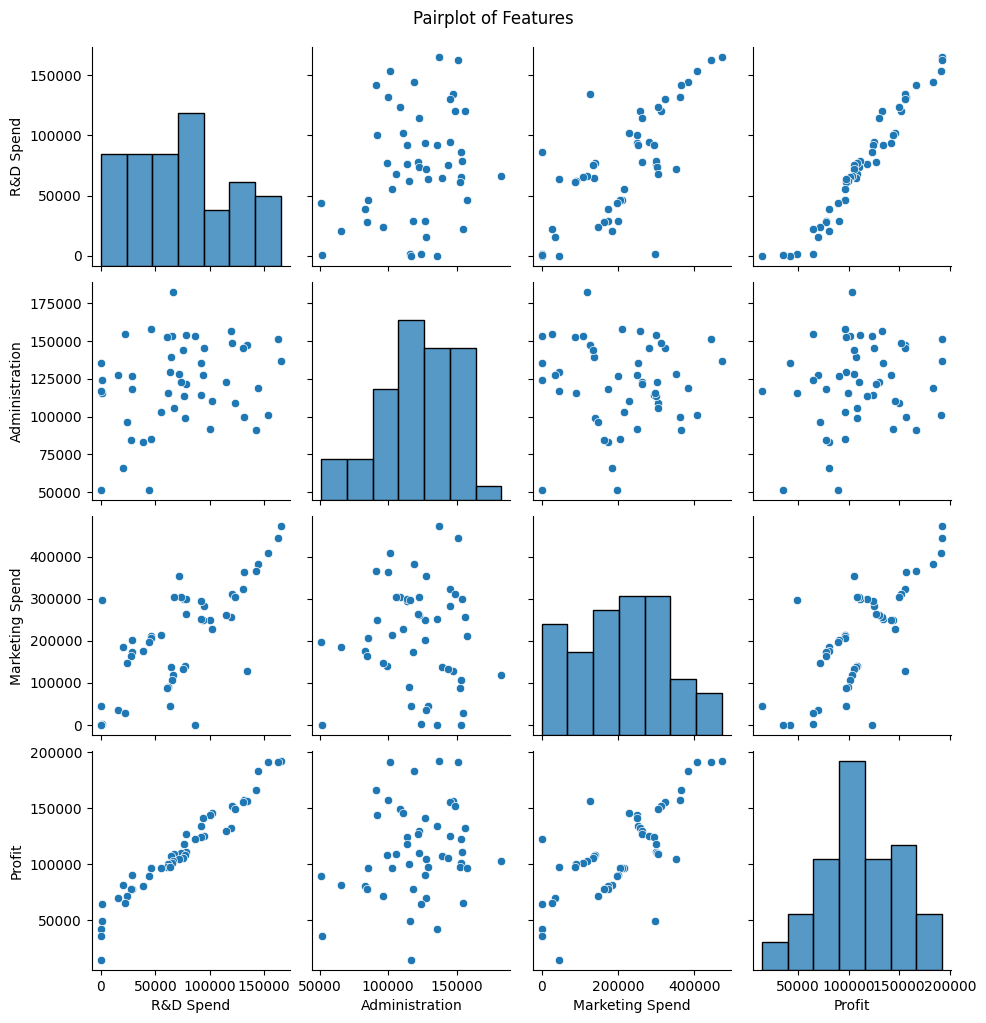

In [14]:
sns.pairplot(df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

## Correlation Matrix

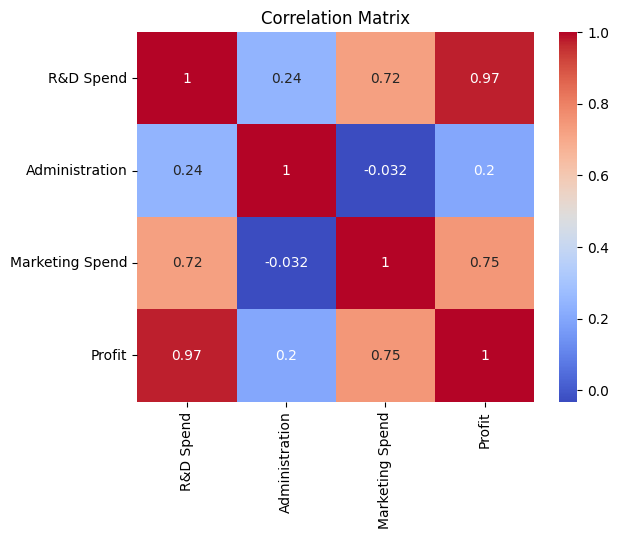

In [15]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Prepare Data for Modeling

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
X = df.drop('Profit', axis=1)
y = df['Profit']
categorical_features = ['State']
numeric_features = X.drop(columns=categorical_features).columns.tolist()

# One-hot encode the 'State' column
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

## Train-Test Split and Model Training

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('regressor', LinearRegression())])

## Model Evaluation

In [23]:
from sklearn.metrics import r2_score, mean_squared_error


In [24]:
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.8987
Mean Squared Error: 82010363.05


## Actual vs Predicted Plot

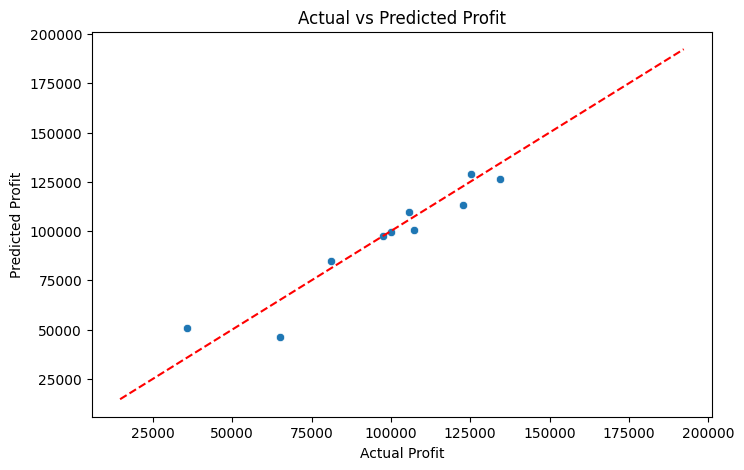

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()